<a href="https://colab.research.google.com/github/il-hari-ous/ipexp1/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting the dataset

In [1]:
import zipfile
!unzip '/content/300m_human.v1i.yolov8-obb.zip'

Archive:  /content/300m_human.v1i.yolov8-obb.zip
   creating: 300m_human.v1i.yolov8-obb/
  inflating: 300m_human.v1i.yolov8-obb/data.yaml  
  inflating: 300m_human.v1i.yolov8-obb/README.dataset.txt  
  inflating: 300m_human.v1i.yolov8-obb/README.roboflow.txt  
   creating: 300m_human.v1i.yolov8-obb/test/
   creating: 300m_human.v1i.yolov8-obb/test/images/
  inflating: 300m_human.v1i.yolov8-obb/test/images/frame106_jpg.rf.f308c2b4f5261e75259ab95ca2bdd533.jpg  
  inflating: 300m_human.v1i.yolov8-obb/test/images/frame108_jpg.rf.c535c62d9b2c9f90df0ed289cb9093bc.jpg  
  inflating: 300m_human.v1i.yolov8-obb/test/images/frame118_jpg.rf.36410665bbec105e75b77799a03f86e9.jpg  
  inflating: 300m_human.v1i.yolov8-obb/test/images/frame119_jpg.rf.e412ffd53393a990322a446e8d28edc9.jpg  
  inflating: 300m_human.v1i.yolov8-obb/test/images/frame11_jpg.rf.f1315f54ef99d8333acd0fdf637e7e47.jpg  
  inflating: 300m_human.v1i.yolov8-obb/test/images/frame15_jpg.rf.f182cbfe8ce1a497052fe4b12c73fc14.jpg  
  inflat

Setting up the environment

In [2]:
!pip install ultralytics opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

Importing the necesssary libraries

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


Training the yolov8 model

In [11]:
# Load the YOLOv8 model, you can choose between different sizes (n, s, m, l, x)
model = YOLO('yolov8n.pt')  # yolov8n.pt is the nano model

# Train the model
model.train(data='/content/300m_human.v1i.yolov8-obb/data.yaml', epochs=10, imgsz=640)


New https://pypi.org/project/ultralytics/8.2.80 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/300m_human.v1i.yolov8-obb/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning /content/300m_human.v1i.yolov8-obb/train/labels.cache... 865 images, 79 backgrounds, 0 corrupt: 100%|██████████| 865/865 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/300m_human.v1i.yolov8-obb/valid/labels.cache... 84 images, 10 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]

Plotting labels to runs/detect/train8/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       3.54      6.194      1.954          3        640: 100%|██████████| 55/55 [11:35<00:00, 12.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:29<00:00,  9.99s/it]

                   all         84        174    0.00583      0.425     0.0759     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.929      3.774      1.649          1        640: 100%|██████████| 55/55 [11:52<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.86s/it]

                   all         84        174      0.139      0.253     0.0982     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.777       2.98       1.58          3        640: 100%|██████████| 55/55 [11:20<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.12s/it]

                   all         84        174      0.362      0.368      0.265     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.725      2.752      1.546          2        640: 100%|██████████| 55/55 [11:17<00:00, 12.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.26s/it]

                   all         84        174      0.344      0.471      0.303       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.611      2.343      1.495          2        640: 100%|██████████| 55/55 [11:18<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.09s/it]

                   all         84        174      0.415        0.5      0.364     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.575      2.108      1.493          3        640: 100%|██████████| 55/55 [11:12<00:00, 12.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.10s/it]

                   all         84        174      0.545      0.537      0.462      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.545      2.043      1.476          3        640: 100%|██████████| 55/55 [11:17<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.85s/it]

                   all         84        174      0.411      0.563      0.369      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.521      1.975      1.458          3        640: 100%|██████████| 55/55 [11:17<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.16s/it]

                   all         84        174      0.453      0.569      0.395      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.517      1.909      1.455          3        640: 100%|██████████| 55/55 [11:20<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.82s/it]

                   all         84        174       0.49      0.586       0.46      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.422      1.877      1.383          0        640: 100%|██████████| 55/55 [11:22<00:00, 12.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.20s/it]

                   all         84        174      0.517      0.563       0.48      0.125



10 epochs completed in 1.973 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.07s/it]


                   all         84        174       0.52      0.563      0.483      0.126
                person         74        174       0.52      0.563      0.483      0.126
Speed: 3.2ms preprocess, 261.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f63e3f8a2f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Validating the model

In [12]:
metrics = model.val()


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/300m_human.v1i.yolov8-obb/valid/labels.cache... 84 images, 10 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:23<00:00,  3.94s/it]


                   all         84        174       0.52      0.563      0.483      0.126
                person         74        174       0.52      0.563      0.483      0.126
Speed: 3.9ms preprocess, 258.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train82


predicting and Bounding Boxes


0: 640x640 (no detections), 219.5ms
Speed: 5.6ms preprocess, 219.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


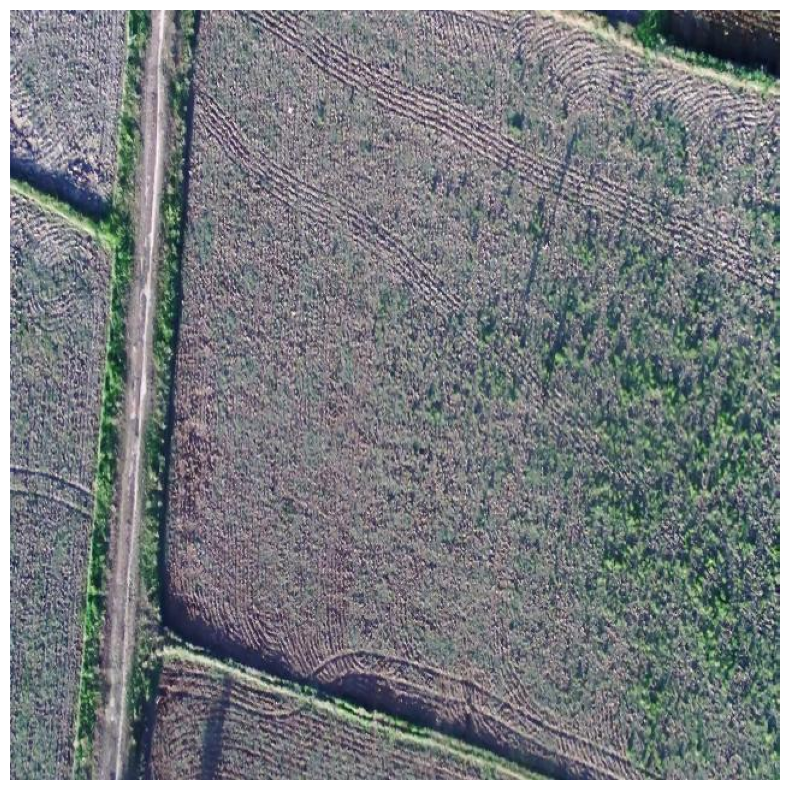

In [14]:
# Load a test image
image_path = '/content/300m_human.v1i.yolov8-obb/test/images/frame118_jpg.rf.36410665bbec105e75b77799a03f86e9.jpg'
image = cv2.imread(image_path)

# Perform inference
results = model(image)

# Get the predictions
predictions = results[0]

# Draw bounding boxes on the image
for box in predictions.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
    conf = box.conf[0]  # Confidence score
    label = int(box.cls[0])  # Class label

    # Draw the bounding box on the image
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box

    # Add the label and confidence score
    text = f'Person: {conf:.2f}'
    cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


predicting multiple images

In [16]:
from pathlib import Path
import torch

# Define the directory where your images are located
image_dir = '/content/300m_human.v1i.yolov8-obb/test/images'
output_dir = '/content/output'
Path(output_dir).mkdir(parents=True, exist_ok=True)

# Load multiple images
image_paths = list(Path(image_dir).glob('*.jpg'))  # Adjust the extension based on your image files

# Predict on each image
for img_path in image_paths:
    results = model.predict(source=img_path)

    # Iterate through the list of results and save each one
    for i, result in enumerate(results):
        result_image_path = Path(output_dir) / f"pred_{i}_{img_path.name}"
        result.save(result_image_path)

    # Alternatively, you can print the results or save them in a different format
    print(f"Predictions for {img_path.name}: {results}")



image 1/1 /content/300m_human.v1i.yolov8-obb/test/images/frame216_jpg.rf.4d282094ab1f8ba5aec326ac4998cd97.jpg: 640x640 3 persons, 214.1ms
Speed: 4.2ms preprocess, 214.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Predictions for frame216_jpg.rf.4d282094ab1f8ba5aec326ac4998cd97.jpg: [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'None', 1: 'person'}
obb: None
orig_img: array([[[142, 114, 113],
        [138, 113, 111],
        [ 94,  69,  67],
        ...,
        [ 71,  72,  46],
        [ 78,  77,  49],
        [ 85,  83,  53]],

       [[166, 138, 137],
        [151, 126, 124],
        [122,  97,  95],
        ...,
        [ 67,  70,  44],
        [ 71,  73,  44],
        [ 67,  67,  37]],

       [[219, 191, 190],
        [150, 125, 123],
        [107,  82,  80],
        ...,
        [ 62,  70,  40],
        [ 67,  73,  42],
        [ 54,  61,  28]],

       ...

Save the model

In [17]:
model.export(format="torchscript")  # Save the model in TorchScript format


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

TorchScript: starting export with torch 2.3.1+cu121...
TorchScript: export success ✅ 2.9s, saved as 'runs/detect/train8/weights/best.torchscript' (11.9 MB)

Export complete (4.6s)
Results saved to /content/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train8/weights/best.torchscript imgsz=640 data=/content/300m_human.v1i.yolov8-obb/data.yaml  
Visualize:       https://netron.app


'runs/detect/train8/weights/best.torchscript'